# Tutorial in the Use of libRadtran

libRadtran is a collection of tools for computational radiative transfer in the Earth atmosphere. 
This tutorial only shows the reading of uvspec input files and the reading of uvspec output files, as well as plotting of some outputs.

In order to run uvspec cases, a working installation of libRadtran is required, which is generally only possible on unix/linux machines.

Here it is shown how to read, modify and write libRadtran/uvspec input files, as well as reading of libRadtran/uvspec output files, together with plotting of some results.

For downloads and further information, go to http://www.libradtran.org


In [1]:
import morticia.rad.librad as librad
# Use auto reload of librad for development purposes
%load_ext autoreload
%autoreload 1
%aimport morticia.rad.librad
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# use latex for font rendering
mpl.rcParams['text.usetex'] = True  # Use TeX to format labels (takes a bit longer)
%matplotlib inline

In [54]:
# Load a libRadtran example case
# Be default, any include files are expanded, creating a single set of option keywords
libRadCase=librad.Case(filename='./examples/UVSPEC_AER_0000_0000.INP')

In [55]:
# The printed version is identical to what is written in the libRadtran/uvspec input file
print libRadCase

atmosphere_file ../data/atmmod/afglus.dat
source solar ../data/solar_flux/atlas_plus_modtran
mol_modify O3 300. DU
day_of_year 170
albedo 0.2
sza 32.0
rte_solver disort
number_of_streams 6
wavelength 299.0 341.0
slit_function_file ../examples/TRI_SLIT.DAT
spline 300 340 1
quiet 
aerosol_vulcan 1
aerosol_haze 6
aerosol_season 1
aerosol_visibility 20.0
aerosol_angstrom 1.1 0.2
aerosol_modify ssa scale 0.85
aerosol_modify gg set 0.70
aerosol_file tau ../examples/AERO_TAU.DAT
phi 0.0 11.25 22.5 33.75 45.0 56.25 67.5 78.75 90.0 101.25 112.5 123.75 135.0 146.25 157.5 168.75 180.0 191.25 202.5
umu -1.0 -0.998756921219 -0.995030775365 -0.988830826225 -0.980172487849 -0.969077286229 -0.955572805786 -0.939692620786 -0.92147621187 -0.900968867902 -0.87822157337 -0.853290881632 -0.826238774316 -0.797132507223 -0.766044443119 -0.73305187183 -0.698236818086 -0.661685837597 -0.623489801859 -0.583743672235 -0.542546263866 -0.5 -0.456210657353 -0.411287103131 -0.365341024366 -0.318486650252 -0.27084046

In [56]:
libRadCase.readout()  # Read uvspec output data for this case

[ 0.]
zout


In [51]:
from morticia.tools.xd import *


In [53]:
z = xd_identity([0.0], 'zout')

In [15]:
libRadCase.process_outputs()

AttributeError: Case instance has no attribute 'uu'

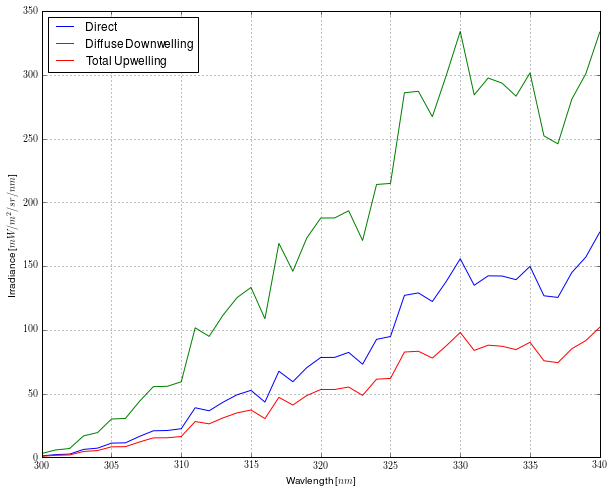

In [6]:
plt.figure(figsize=(10,8))
plt.plot(libRadCase.wvl, libRadCase.edir, libRadCase.wvl, libRadCase.edn, libRadCase.wvl, libRadCase.eup)
plt.xlabel('Wavlength [$nm$]')
plt.ylabel('Irradiance [$mW/m^2/sr/nm$]')
plt.legend(['Direct','Diffuse Downwelling','Total Upwelling'], loc='upper left')
plt.grid()

In [7]:
# Thermal two-stream fast irradiances using the RODENTS solver
libRadCase=librad.Case(filename='examples/UVSPEC_RODENTS_ZOUT_THERMAL.INP')

In [8]:
libRadCase.readout()

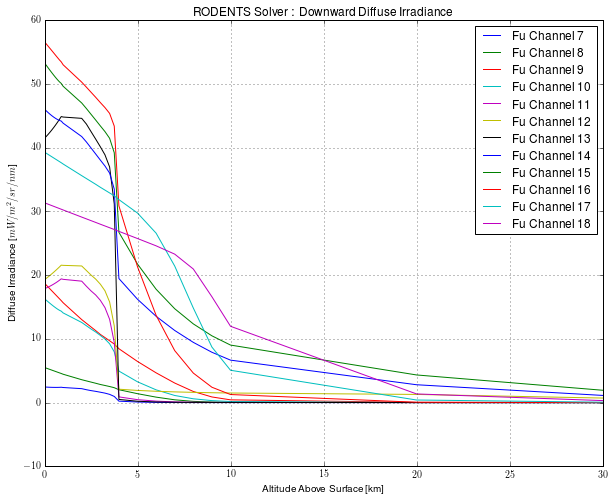

In [9]:
plt.figure(figsize=(10,8))
plt.plot(libRadCase.zout, libRadCase.edn)
plt.title('RODENTS Solver : Downward Diffuse Irradiance')
plt.xlabel('Altitude Above Surface [km]')
plt.ylabel('Diffuse Irradiance [$mW/m^2/sr$]')
plt.legend(['Fu Channel ' + str(chan) for chan in range(7,19)])
plt.xlim([0,30])
plt.grid()

In [10]:
# Lidar solver example
# The lidar is at an altitude of 8.55 km, looking straight down
# Ground albedo is 0.2, causing sudden increase in returned signal at that range
# There is a cloud layer betweeen 2 and 4 km above ground
ss=librad.Case(filename='examples/UVSPEC_SSLIDAR.INP')

In [11]:
ss.readout()  # Read the uvspec output

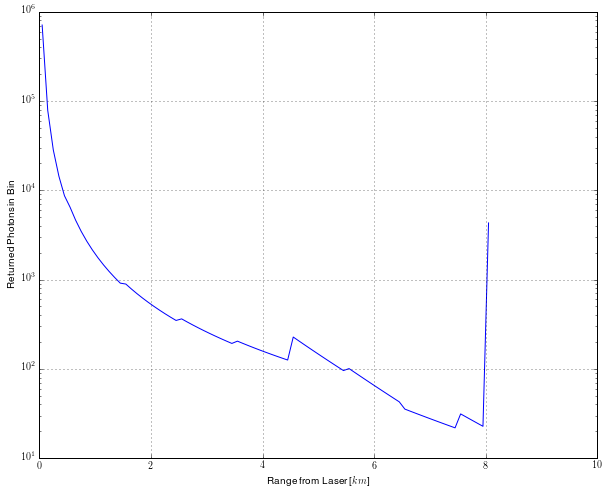

In [12]:
plt.figure(figsize=(10,8))
plt.semilogy(ss.center_of_range, ss.number_of_photons)
plt.xlabel('Range from Laser [$km$]')
plt.ylabel('Returned Photons in Bin')
plt.grid()


In [38]:
# This case shows use of the RPV (Rahman, Pinty, Verstraete [1993]) BRDF for a "plowed field"
# The wavelength is 400 nm (only)
x = librad.Case(filename='examples/UVSPEC_BRDF.INP')

In [39]:
x

atmosphere_file ../data/atmmod/afglus.dat
source solar ../data/solar_flux/atlas_plus_modtran
sza 30.0
rte_solver disort
deltam on
number_of_streams 16
wavelength 400.0 400.0
brdf_rpv rho0 0.076
brdf_rpv k 0.648
brdf_rpv theta -0.290
umu 0.001 0.01 0.02 0.05 0.1 0.15 0.2 0.25 0.3 0.35 0.4 0.45 0.5 0.55 0.6 0.65 0.7 0.75 0.8 0.81 0.82 0.83 0.84 0.845 0.85 0.86 0.87 0.88 0.89 0.9 0.925 0.95 0.975 1.0
phi 0 90 180
no_scattering mol
no_absorption 
zout 50.0
output_quantity transmittance
quiet 

In [40]:
x.output_quantity

'transmittance'

In [41]:
x.readout()

In [47]:
x.xd_uu['stokes']

<xray.DataArray 'stokes' (stokes: 1)>
array([0])
Coordinates:
  * stokes   (stokes) int32 0
Attributes:
    units: 
    long_name: Stokes Parameter

In [ ]:
x.uu.shape

In [ ]:
np.zeros(1)

In [ ]:
dir(x)

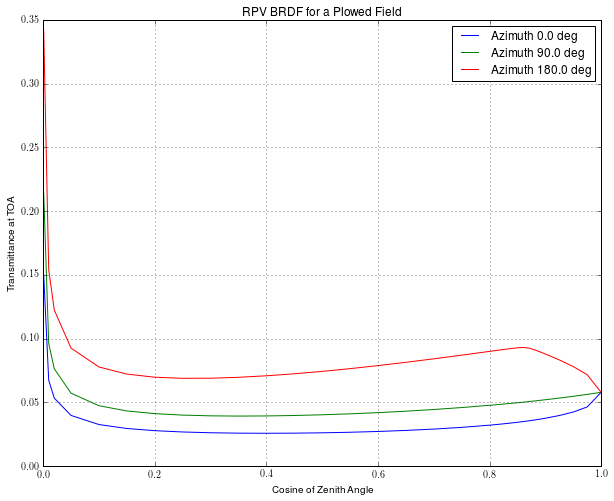

In [27]:
plt.figure(figsize=(10, 8))
plt.title('RPV BRDF for a Plowed Field')
plt.plot(x.umu, x.uu[:,:,0,0,0])  # Variable order is umu, phi, wvl, zout, nstokes
plt.xlabel('Cosine of Zenith Angle')
plt.ylabel('Transmittance at TOA')
plt.legend(['Azimuth ' + str(phi) + ' deg' for phi in x.phi])
plt.grid()

In [49]:
polz = librad.Case(filename='examples/UVSPEC_AEROSOL_OPAC_POLaZOUT.INP')
polz.readout()

In [50]:
len(polz.uu)

3

In [51]:
polz.level_values

array([  0.,  inf])

In [52]:
polz.uu.shape

(3L, 3L, 2L, 2L, 4L)

In [53]:
polz.zout_sea

array([  0.,  inf])

In [54]:
polz.rad_units

['mW', 'm^2', 'nm']

In [ ]:
dir(polz)

In [55]:
# Here is a case with radiances in both umu and phi
y = librad.Case(filename='examples/UVSPEC_RADIANCES_ZOUT.INP')

In [56]:
y.readout()

In [ ]:
print y.n_umu, y.n_phi, y.n_wvl, y.n_zout
print y.u0u.shape
y.u0u[:,1,0]

In [ ]:
# Plot radiances 
plt.figure(figsize=(10, 8), )
for iumu in range(y.n_umu):
    plt.plot(y.wvl, y.uu[iumu,0,:,0])  # order is umu, phi, wvl, zout, stokes
plt.xlabel('Wavelength [$nm$]')
plt.ylabel('Radiance [$mW/m^2/sr/nm$]')
plt.grid()

In [ ]:
plt.figure(figsize=(10, 8))
for iphi in range(y.n_phi):
    plt.plot(y.wvl, y.uu[2,iphi,:,1]) # order is umu, phi, wvl, zout, stokes
plt.xlabel('Wavelength [$nm$]')
plt.ylabel('Radiance [$mW/m^2/sr/nm$]')
plt.grid()

In [ ]:
# Solar irradiance profiles with old LOWTRAN model (fast, but not very accurate)
z = librad.Case(filename='examples/UVSPEC_PROFILES4.INP')

In [ ]:
z.readout()

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(z.wvl, z.edir.T)
plt.title('Direct Solar Irradiance (LOWTRAN Model)')
plt.legend(['Altitude ' + str(zout) + ' km' for zout in z.zout])
plt.xlabel('Wavelength [$nm$]')
plt.grid()

In [ ]:
# Two-stream irradiances using the fine spectral resolution REPTRAN model
lRep = librad.Case(filename='examples/UVSPEC_REPTRAN_SOLAR.INP')

In [ ]:
lRep.readout()

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(lRep.wvl, lRep.edir, lRep.wvl, lRep.edn)
plt.title('REPTRAN Solar Band Model : Irradiance')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Irradiance [$mW/m^2/sr/nm$]')
plt.legend(['Direct Solar', 'Diffuse Downwelling'])
plt.grid()

In [ ]:
z = librad.Case(filename='examples/UVSPEC_RADIANCES_ZOUT.INP')

In [ ]:
z.readout()

In [ ]:
k = librad.Case(filename='examples/UVSPEC_REPTRAN_THERMAL.INP')


In [ ]:
k.readout()

In [ ]:
k.output_quantity

In [ ]:
c = librad.Case(filename='examples/UVSPEC_FILTER_SOLAR.INP')

In [ ]:
c

In [ ]:
c.readout()

In [ ]:
c.rad_units

In [58]:
p = librad.Case(filename='examples/UVSPEC_AEROSOL_OPAC_POLaZOUT.INP')

In [59]:
p.readout()

In [ ]:
b = librad.Case(filename='examples/UVSPEC_MC.INP')

In [ ]:
b.readout()

In [ ]:
b.fluxline

In [ ]:
b.edir, b.edn, b.eup, b.uavgdir, b.uavgdn, b.uavgup


In [ ]:
b.wvl

In [ ]:
# Reproduce the sunglint case plot for the Sentinel 3 OLCI band 13
sung = librad.Case(filename='examples/GUI/radiance_sentinel_sunglint/radiance_sentinel_sunglint.INP')

In [ ]:
sung.readout()

In [ ]:
sung

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(np.rad2deg(np.arcsin(-sung.umu[::-1])), sung.uu[1::2],
         np.rad2deg(np.arcsin(sung.umu)), sung.uu[-2::-2])
plt.xlim([-90,90])
plt.ylim([0,110])
plt.title('Sunglint in Sentinel 3 OLCI Band 13')
plt.ylabel(r"Radiance [$mW/m^2/sr/nm$]", fontsize = 12)
plt.xlabel(r"Viewing nadir angle $\theta$ (degree)", fontsize = 12)
plt.grid()

In [ ]:
sung

In [ ]:
c,s=libRadCase.run(block=False)

In [ ]:
c

In [ ]:
import sys

In [ ]:
sys.path

In [60]:
p.xd_uu

<xray.DataArray 'specrad' (umu: 3, phi: 3, wvl: 2, zout: 2, stokes: 4)>
array([[[[[  1.95416500e+02,   1.50729800e+00,   0.00000000e+00,
             0.00000000e+00],
          [  1.95416500e+02,   1.50729800e+00,   0.00000000e+00,
             0.00000000e+00]],

         [[  1.95416500e+02,   1.50729800e+00,   0.00000000e+00,
             0.00000000e+00],
          [  1.95416500e+02,   1.50729800e+00,   0.00000000e+00,
             0.00000000e+00]]],


        [[[  1.00357000e+02,   4.60577400e+00,   1.45117000e+01,
             2.15992200e-02],
          [  1.00357000e+02,   4.60577400e+00,   1.45117000e+01,
             2.15992200e-02]],

         [[  1.00357000e+02,   4.60577400e+00,   1.45117000e+01,
             2.15992200e-02],
          [  1.00357000e+02,   4.60577400e+00,   1.45117000e+01,
             2.15992200e-02]]],


        [[[  8.08653300e+01,  -2.40141100e+01,  -2.62952800e-06,
            -1.37106100e-09],
          [  8.08653300e+01,  -2.40141100e+01,  -2.62952800e-